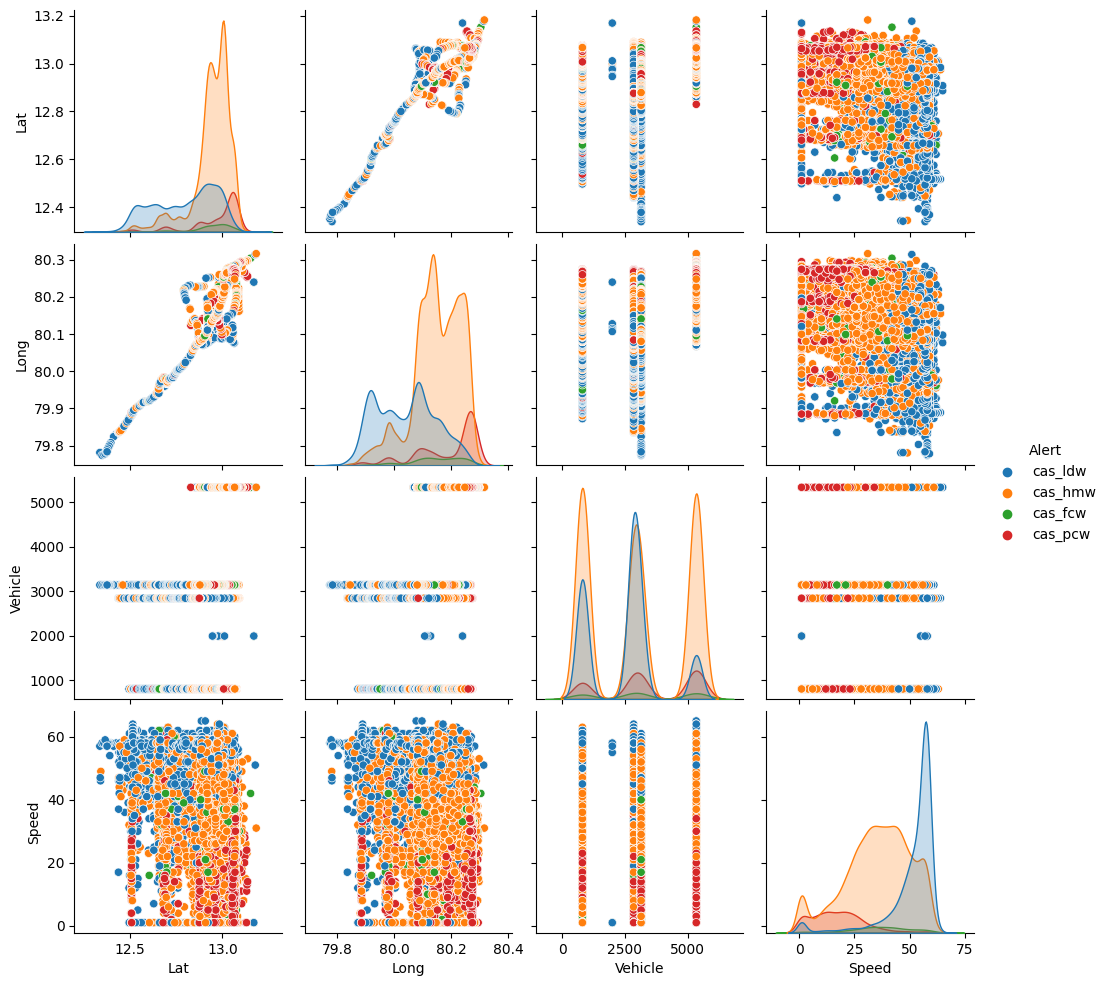

Streaming output truncated to the last 5000 lines.
Vehicle 805 is not likely to be in a collision
Vehicle 3143 is not likely to be in a collision
Vehicle 2846 is not likely to be in a collision
Vehicle 5339 is not likely to be in a collision
Vehicle 2846 is not likely to be in a collision
Vehicle 805 is not likely to be in a collision
Vehicle 5339 is not likely to be in a collision
Vehicle 805 is not likely to be in a collision
Vehicle 2846 is not likely to be in a collision
Vehicle 5339 is not likely to be in a collision
Vehicle 805 is not likely to be in a collision
Vehicle 805 is not likely to be in a collision
Vehicle 5339 is not likely to be in a collision
Vehicle 5339 is not likely to be in a collision
Vehicle 805 is not likely to be in a collision
Vehicle 5339 is not likely to be in a collision
Vehicle 5339 is not likely to be in a collision
Vehicle 2846 is not likely to be in a collision
Vehicle 5339 is not likely to be in a collision
Vehicle 2846 is not likely to be in a colli

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
data = pd.read_csv('data.csv')
data.dropna(inplace=True)
data.fillna(0, inplace=True)
sns.pairplot(data, hue='Alert')
plt.show()
data.describe()
model = LogisticRegression()
model.fit(data[['Speed', 'Lat', 'Long']], data['Alert'])
predictions = model.predict(data[['Speed', 'Lat', 'Long']])
for i in range(len(predictions)):
    if predictions[i] == 1:
        print('Vehicle {} is likely to be in a collision'.format(data['Vehicle'][i]))
    else:
        print('Vehicle {} is not likely to be in a collision'.format(data['Vehicle'][i]))


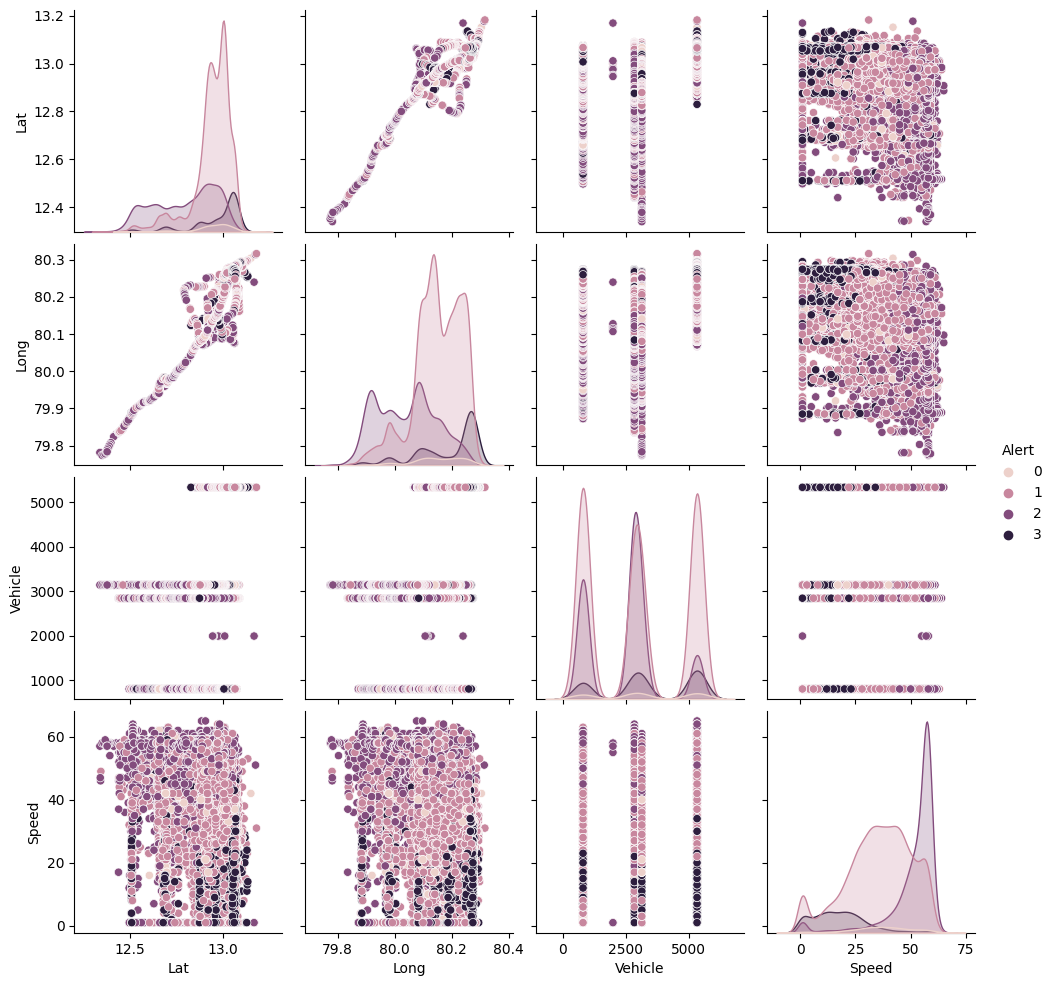

Streaming output truncated to the last 5000 lines.
Vehicle 805 is likely to be in a collision
Vehicle 3143 is likely to be in a collision
Vehicle 2846 is not likely to be in a collision
Vehicle 5339 is likely to be in a collision
Vehicle 2846 is not likely to be in a collision
Vehicle 805 is likely to be in a collision
Vehicle 5339 is likely to be in a collision
Vehicle 805 is likely to be in a collision
Vehicle 2846 is not likely to be in a collision
Vehicle 5339 is likely to be in a collision
Vehicle 805 is likely to be in a collision
Vehicle 805 is likely to be in a collision
Vehicle 5339 is likely to be in a collision
Vehicle 5339 is likely to be in a collision
Vehicle 805 is likely to be in a collision
Vehicle 5339 is likely to be in a collision
Vehicle 5339 is likely to be in a collision
Vehicle 2846 is not likely to be in a collision
Vehicle 5339 is likely to be in a collision
Vehicle 2846 is not likely to be in a collision
Vehicle 805 is likely to be in a collision
Vehicle 805 

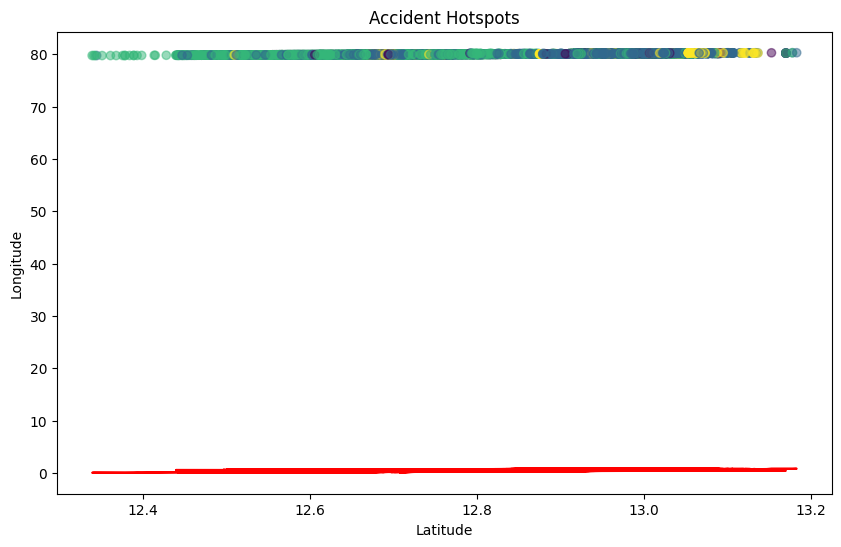

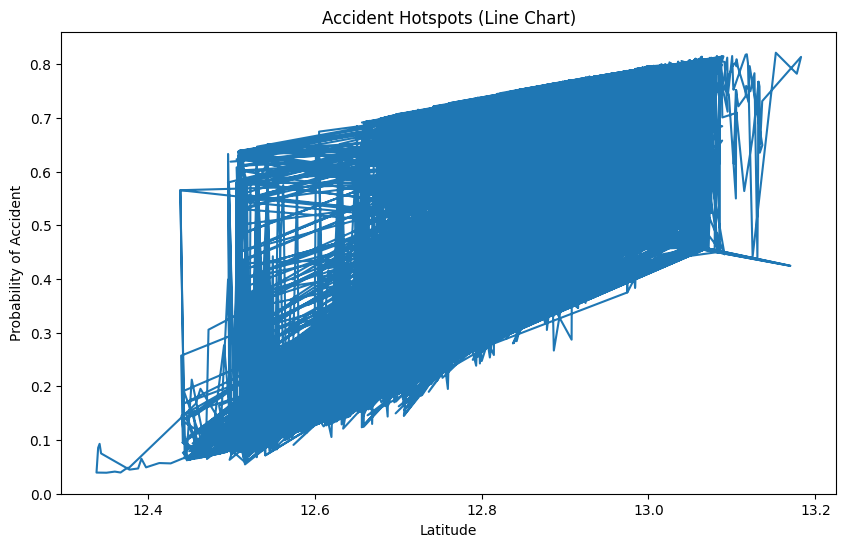

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('data.csv')
le = LabelEncoder()
data['Alert'] = le.fit_transform(data['Alert'])
data.dropna(inplace=True)
data.fillna(0, inplace=True)
sns.pairplot(data, hue='Alert')
plt.show()
data.describe()
model = LogisticRegression()
model.fit(data[['Speed', 'Lat', 'Long']], data['Alert'])
predictions = model.predict(data[['Speed', 'Lat', 'Long']])
for i in range(len(predictions)):
    if predictions[i] == 1:
        print('Vehicle {} is likely to be in a collision'.format(data['Vehicle'][i]))
    else:
        print('Vehicle {} is not likely to be in a collision'.format(data['Vehicle'][i]))
plt.figure(figsize=(10, 6))
plt.scatter(data['Lat'], data['Long'], c=data['Alert'], alpha=0.5)
plt.plot(data['Lat'], model.predict_proba(data[['Speed', 'Lat', 'Long']])[:, 1], color='red')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Accident Hotspots')
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(data['Lat'], model.predict_proba(data[['Speed', 'Lat', 'Long']])[:, 1])
plt.xlabel('Latitude')
plt.ylabel('Probability of Accident')
plt.title('Accident Hotspots (Line Chart)')
plt.show()


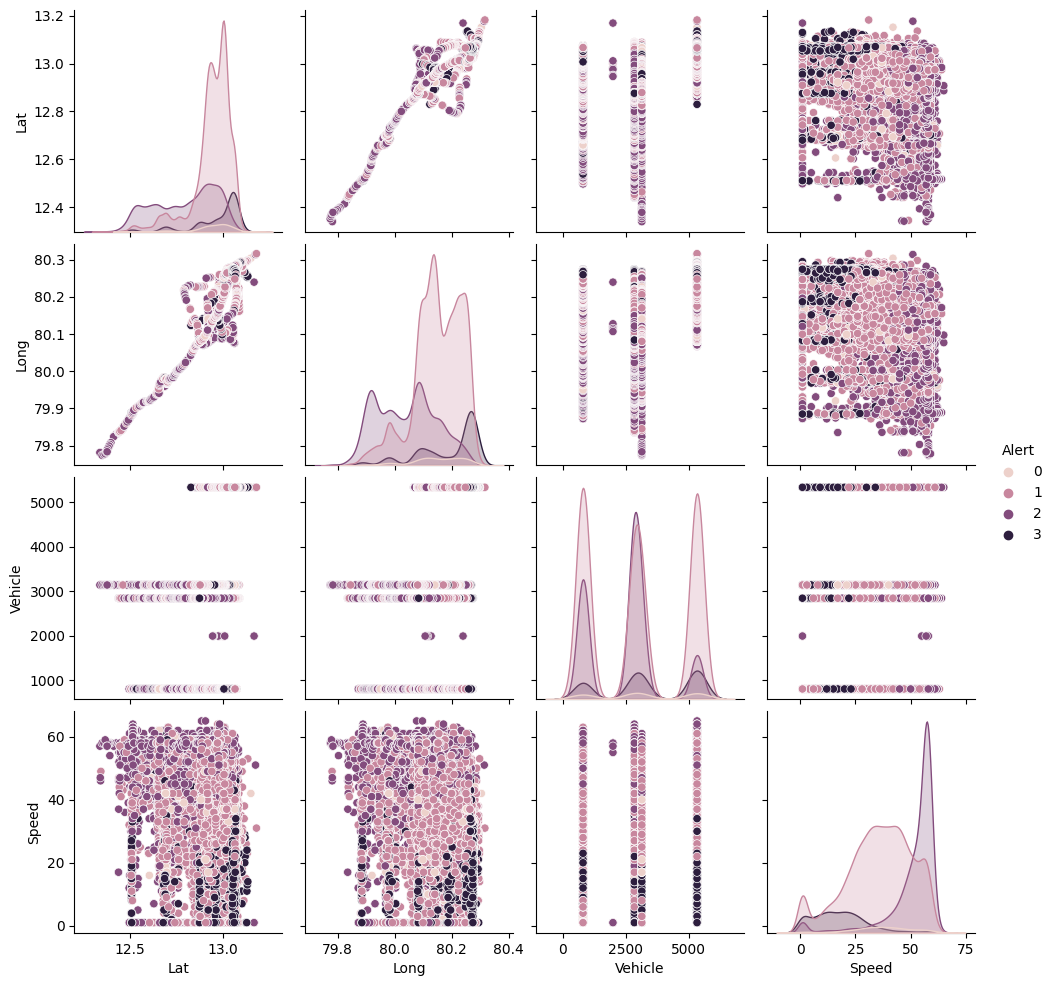

The number of vehicles likely to be in a collision is 14752
The number of vehicles not likely to be in a collision is 6573


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('data.csv')
le = LabelEncoder()
data['Alert'] = le.fit_transform(data['Alert'])
data.dropna(inplace=True)
data.fillna(0, inplace=True)
sns.pairplot(data, hue='Alert')
plt.show()
data.describe()
model = LogisticRegression()
model.fit(data[['Speed', 'Lat', 'Long']], data['Alert'])
predictions = model.predict_proba(data[['Speed', 'Lat', 'Long']])[:, 1]
data['Likelihood of Collision'] = predictions
likely_collision_data = data[data['Likelihood of Collision'] >= 0.5]
not_likely_collision_data = data[data['Likelihood of Collision
print('The number of vehicles likely to be in a collision is {}'.format(len(likely_collision_data)))
print('The number of vehicles not likely to be in a collision is {}'.format(len(not_likely_collision_data)))


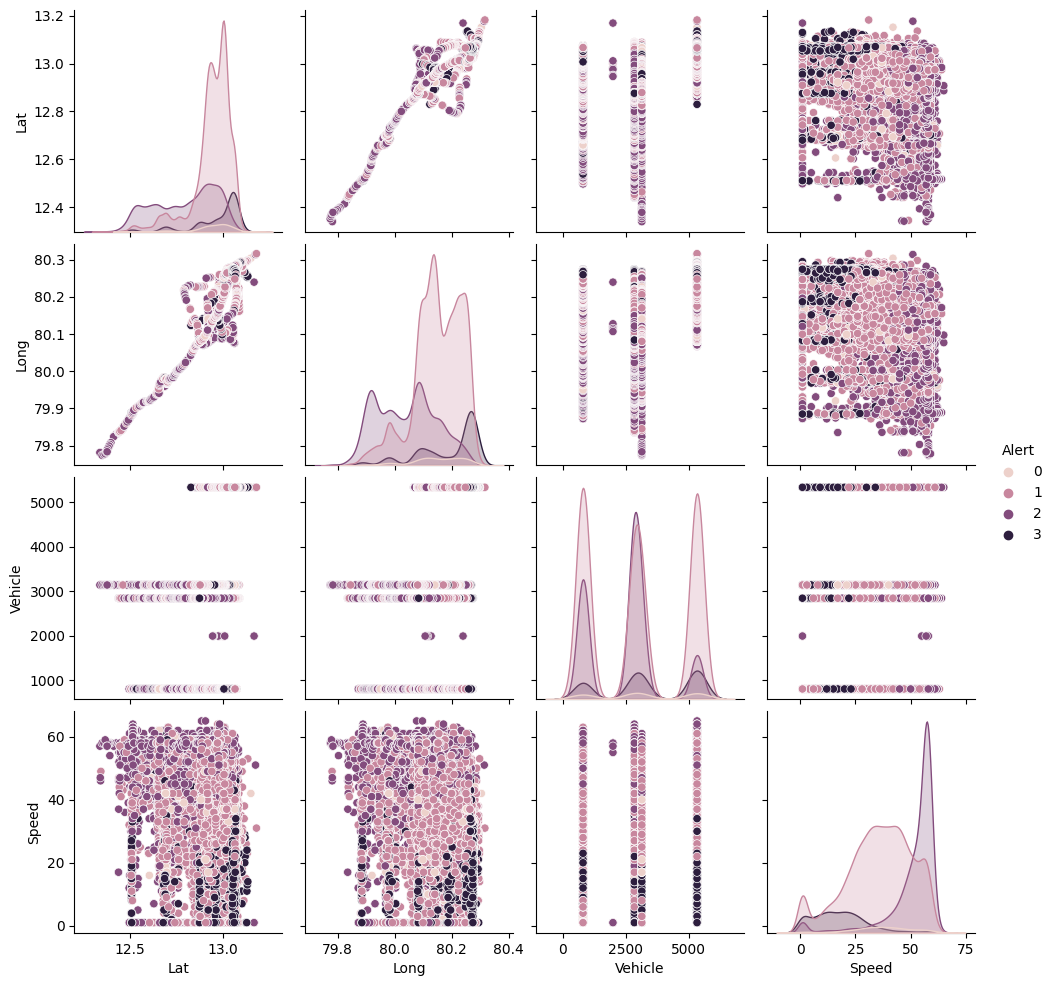

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('data.csv')
le = LabelEncoder()
data['Alert'] = le.fit_transform(data['Alert'])
data.dropna(inplace=True)
data.fillna(0, inplace=True)
sns.pairplot(data, hue='Alert')
plt.show()
data.describe()
model = LogisticRegression()
model.fit(data[['Speed', 'Lat', 'Long']], data['Alert'])
predictions = model.predict_proba(data[['Speed', 'Lat', 'Long']])[:, 1]
data['Likelihood of Collision'] = predictions
likely_collision_data = data[data['Likelihood of Collision'] >= 0.5]
not_likely_collision_data = data[data['Likelihood of Collision'] < 0.5]
likely_collision_data.to_excel('likely_collision_data.xlsx')
not_likely_collision_data.to_excel('not_likely_collision_data.xlsx')


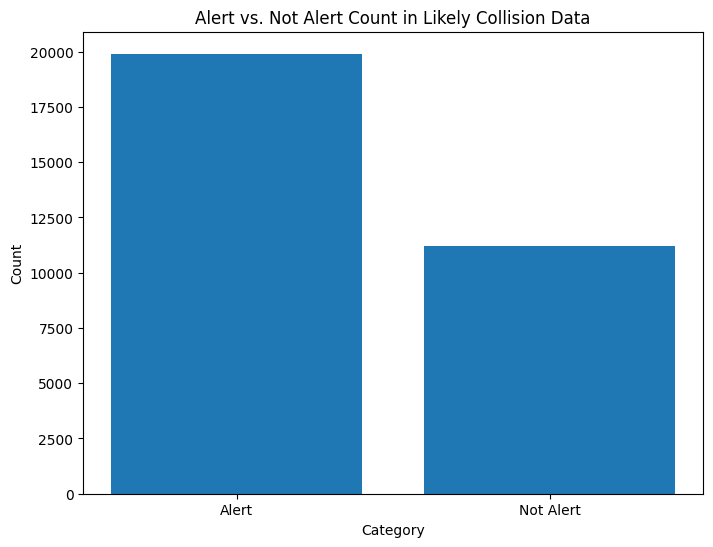

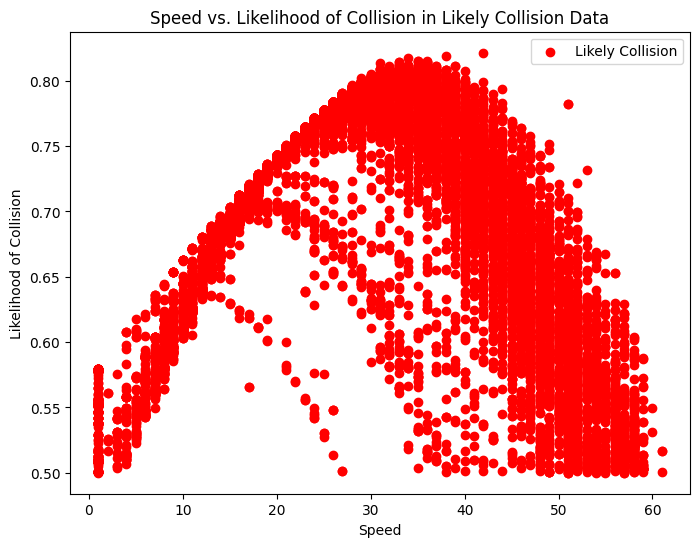

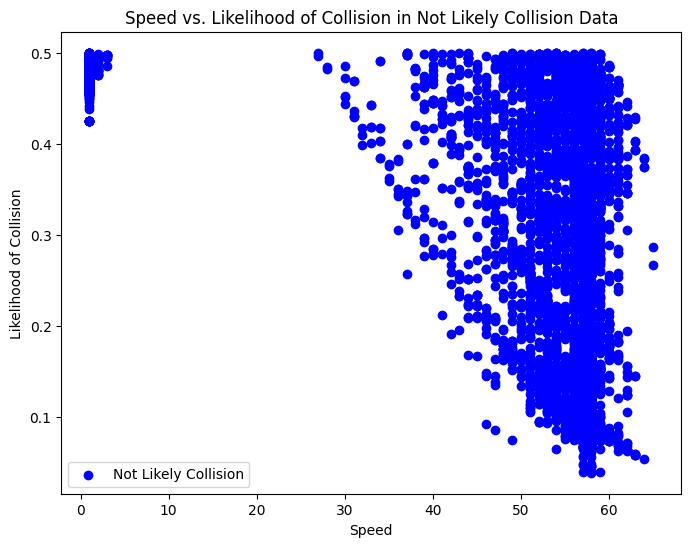

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
likely_collision_data = pd.read_excel('likely_collision_data.xlsx')
not_likely_collision_data = pd.read_excel('not_likely_collision_data.xlsx')
plt.figure(figsize=(8, 6))
plt.bar(['Alert', 'Not Alert'],
        [likely_collision_data['Alert'].sum(), not_likely_collision_data['Alert'].sum()])
plt.title('Alert vs. Not Alert Count in Likely Collision Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(8, 6))
plt.scatter(likely_collision_data['Speed'], likely_collision_data['Likelihood of Collision'], c='red', label='Likely Collision')
plt.title('Speed vs. Likelihood of Collision in Likely Collision Data')
plt.xlabel('Speed')
plt.ylabel('Likelihood of Collision')
plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
plt.scatter(not_likely_collision_data['Speed'], not_likely_collision_data['Likelihood of Collision'], c='blue', label='Not Likely Collision')
plt.title('Speed vs. Likelihood of Collision in Not Likely Collision Data')
plt.xlabel('Speed')
plt.ylabel('Likelihood of Collision')
plt.legend()
plt.show()
